In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('car_prices.csv')

# Impute 'Condition' with median
data['condition'].fillna(data['condition'].median(), inplace=True)

# Impute 'Odometer' with mean
data['odometer'].fillna(data['odometer'].mean(), inplace=True)
print("Remaining missing values:")
print(data.isnull().sum())

# Descriptive Statistics
print("Descriptive statistics:")
print(data.describe())
print(data.info())

<ipython-input-4-3235d9802469>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['condition'].fillna(data['condition'].median(), inplace=True)
<ipython-input-4-3235d9802469>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Remaining missing values:
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64
Descriptive statistics:
                year      condition       odometer            mmr  \
count  558795.000000  558795.000000  558795.000000  558795.000000   
mean     2010.038646      30.763947   68323.830415   13769.417362   
std         3.966839      13.275236   53393.833298    9679.982035   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      24.000000   28377.500000    7100.000000   
50%      2012.000000      35.000000   52270.000000   12250.000000   
75%      2013.000000      41.000000   99106.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
coun

In [9]:
# Convert 'SaleDate' to datetime object
data['saledate'] = pd.to_datetime(data['saledate'], format='%a %b %d %Y %H:%M:%S GMT%z', utc=True)

# Extracting Year, Month, Day of Week, and Hour
data['Year'] = data['saledate'].dt.year
data['Month'] = data['saledate'].dt.month
data['DayOfWeek'] = data['saledate'].dt.day_name()
data['Hour'] = data['saledate'].dt.hour

In [11]:
# Display the cleaned data
print(data.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america  inc  20500         21500   
1                 kia motors america  

<ipython-input-13-ba17fe95164c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=data, palette='viridis')


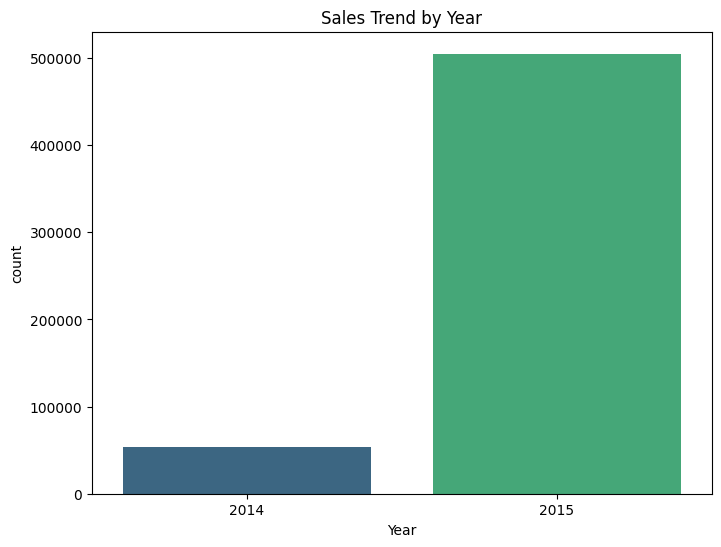

In [13]:
# Plotting trends
# 1. Trend by Year
plt.figure(figsize=(8, 6))
sns.countplot(x='Year', data=data, palette='viridis')
plt.title('Sales Trend by Year')
plt.show()

<ipython-input-14-4eab7caa9abd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=data, palette='coolwarm')


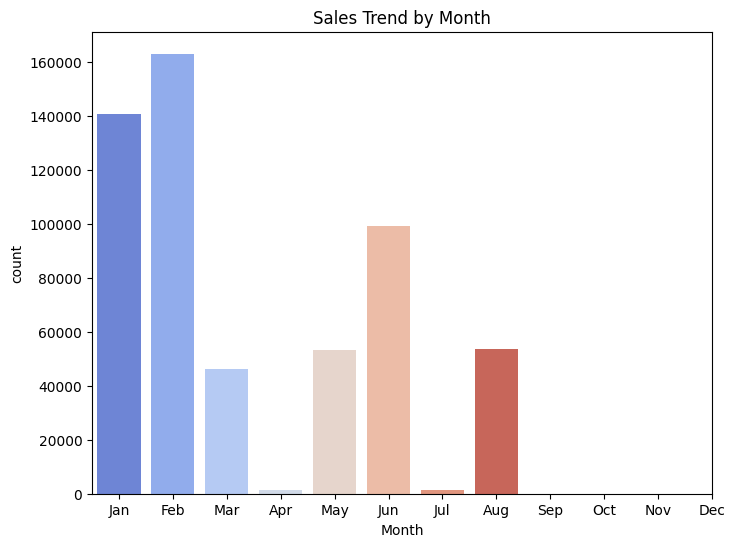

<ipython-input-14-4eab7caa9abd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=data, palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


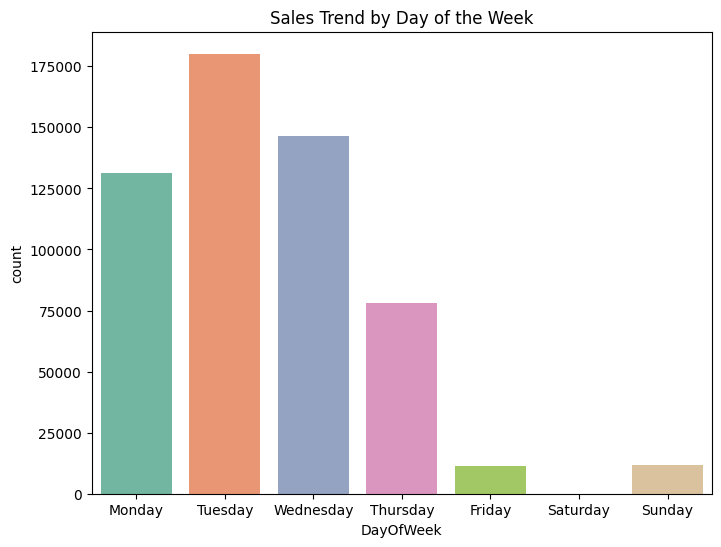

<ipython-input-14-4eab7caa9abd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=data, palette='magma')


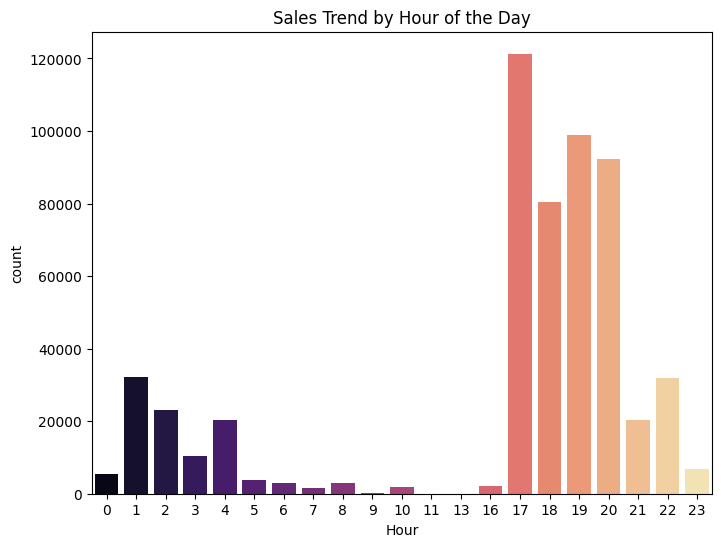

In [14]:
# 2. Trend by Month
plt.figure(figsize=(8, 6))
sns.countplot(x='Month', data=data, palette='coolwarm')
plt.title('Sales Trend by Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# 3. Trend by Day of the Week
plt.figure(figsize=(8, 6))
sns.countplot(x='DayOfWeek', data=data, palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales Trend by Day of the Week')
plt.show()

# 4. Trend by Hour of the Day
plt.figure(figsize=(8, 6))
sns.countplot(x='Hour', data=data, palette='magma')
plt.title('Sales Trend by Hour of the Day')
plt.show()

In [15]:
# Drop redundant 'Year' column if exists
if 'year' in data.columns:
    data.drop('year', axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
print(data.head())

    make                model        trim   body transmission  \
0    Kia              Sorento          LX    SUV    automatic   
1    Kia              Sorento          LX    SUV    automatic   
2    BMW             3 Series  328i SULEV  Sedan    automatic   
3  Volvo                  S60          T5  Sedan    automatic   
4    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america  inc  20500         21500   
1                 kia motors america  inc  20800         21500   
2  finan

<ipython-input-16-ba17fe95164c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=data, palette='viridis')


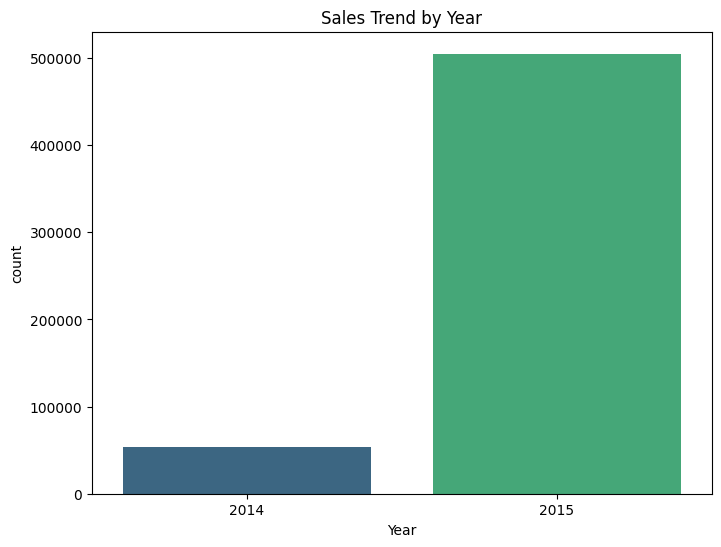

In [16]:
# Plotting trends
# 1. Trend by Year
plt.figure(figsize=(8, 6))
sns.countplot(x='Year', data=data, palette='viridis')
plt.title('Sales Trend by Year')
plt.show()

<ipython-input-17-30e4670ae2f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='sellingprice', data=data, palette='viridis')


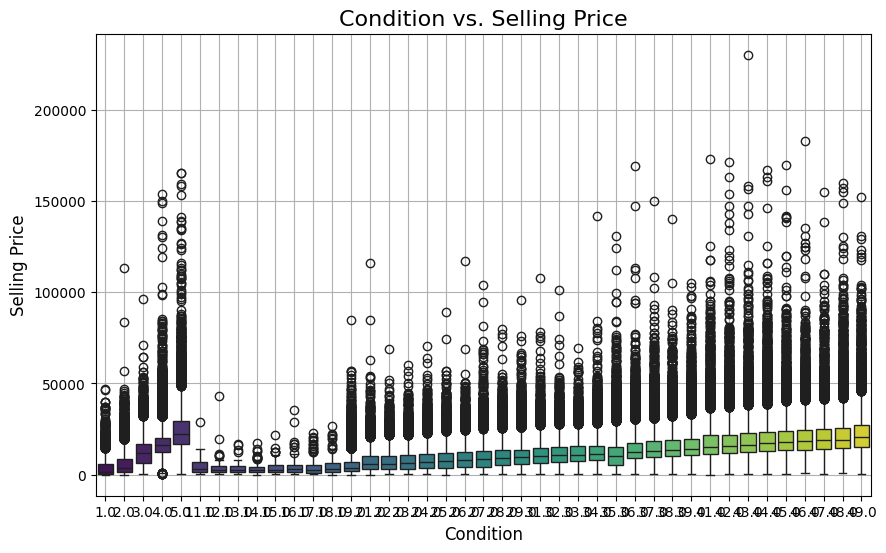

In [17]:
# Visualization: Condition vs. Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='sellingprice', data=data, palette='viridis')
plt.title('Condition vs. Selling Price', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(True)
plt.show()

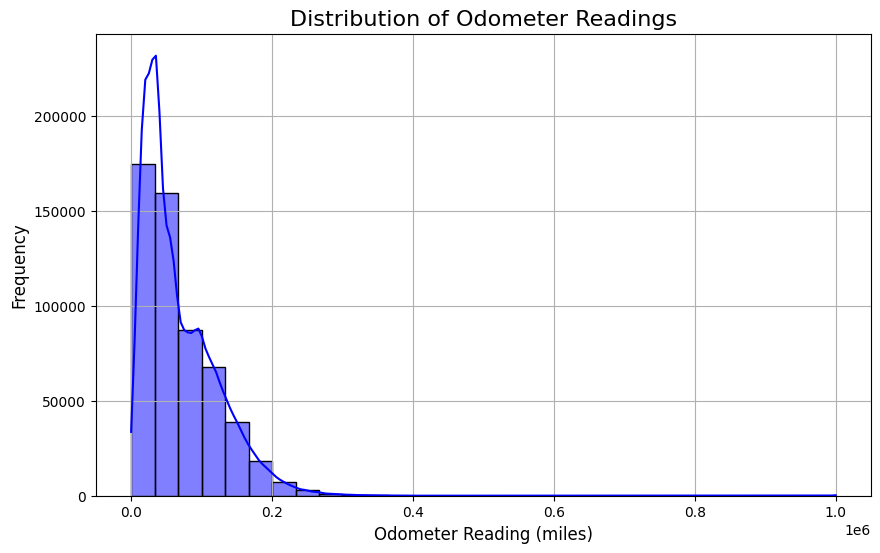

In [18]:
# Visualization: Odometer Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['odometer'], bins=30, kde=True, color='blue')
plt.title('Distribution of Odometer Readings', fontsize=16)
plt.xlabel('Odometer Reading (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

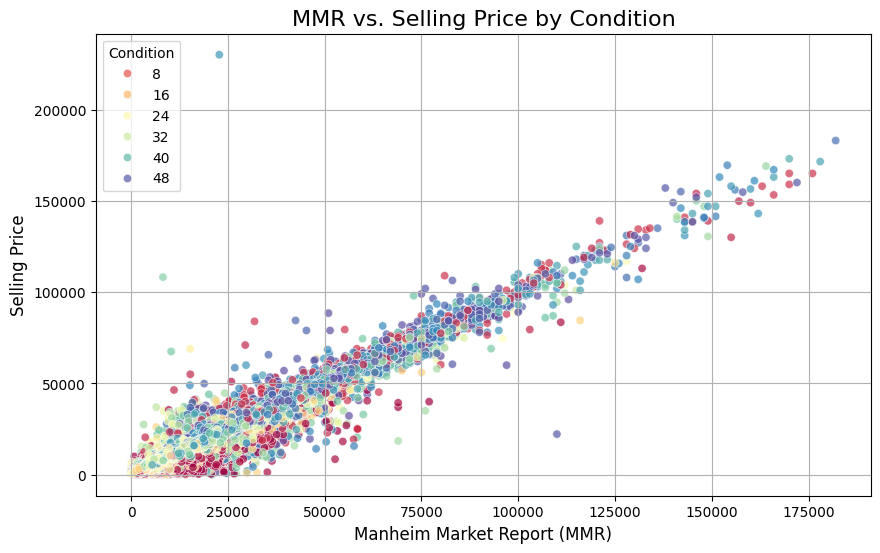

In [19]:
# Visualization: MMR vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mmr', y='sellingprice', data=data, hue='condition', palette='Spectral', alpha=0.7)
plt.title('MMR vs. Selling Price by Condition', fontsize=16)
plt.xlabel('Manheim Market Report (MMR)', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend(title='Condition', fontsize=10)
plt.grid(True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target
X = data[['condition', 'odometer', 'mmr']]
y = data['sellingprice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 1060.9148983479765
Mean Squared Error: 2722299.1385850315
R² Score: 0.9712796373235226


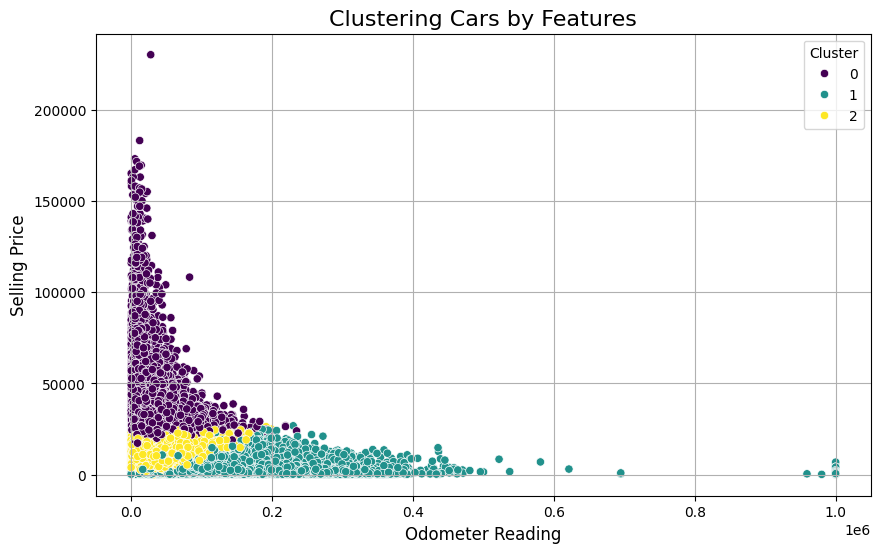

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['condition', 'odometer', 'mmr', 'sellingprice']])

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='sellingprice', hue='Cluster', data=data, palette='viridis')
plt.title('Clustering Cars by Features', fontsize=16)
plt.xlabel('Odometer Reading', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

<ipython-input-22-961bfef2778e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_data, palette='coolwarm')


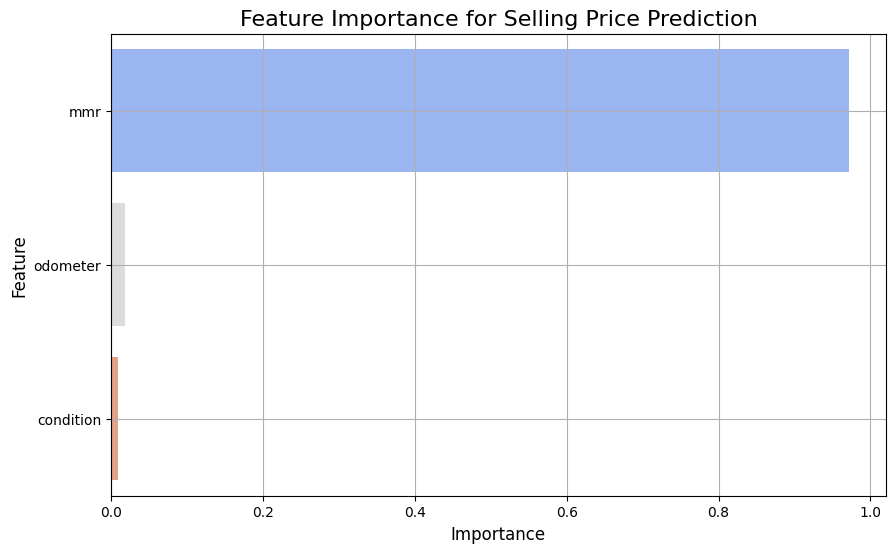

In [22]:
from sklearn.ensemble import RandomForestRegressor
importances = model.feature_importances_

# Display feature importance
features = ['condition', 'odometer', 'mmr']
importance_data = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_data, palette='coolwarm')
plt.title('Feature Importance for Selling Price Prediction', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-25-14d41e2f9f2e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['sellingprice'].resample('M').mean()


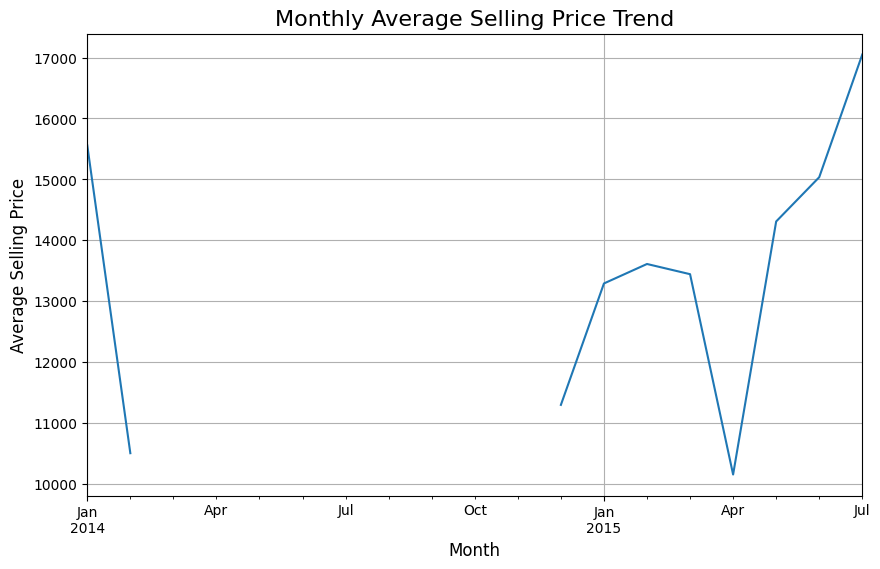

In [25]:
data.set_index('saledate', inplace=True)
data_monthly = data['sellingprice'].resample('M').mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
data_monthly.plot()
plt.title('Monthly Average Selling Price Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Selling Price', fontsize=12)
plt.grid(True)
plt.show()


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Grouping by make and model, then resampling by month
# Before accessing 'saledate' as a column, reset the index if it exists
if data.index.name == 'saledate':
    data.reset_index(inplace=True)

data['saledate'] = pd.to_datetime(data['saledate'], format='%a %b %d %Y %H:%M:%S GMT%z', utc=True)
data.set_index('saledate', inplace=True)
make_model_sales = data.groupby(['make', 'model']).resample('M').size().unstack(0)

# Forecasting for a specific make and model
make = 'Volvo'
model = 'S60'
sales_data = make_model_sales[make].loc[:, model].dropna()

# Applying Exponential Smoothing
model = ExponentialSmoothing(sales_data, trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()
forecast = fit_model.forecast(steps=12)

# Plotting
plt.figure(figsize=(10, 6))
sales_data.plot(label='Observed', color='blue')
forecast.plot(label='Forecast', color='orange')
plt.title(f'Demand Forecasting for {make} {model}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-2533f844678b>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  make_model_sales = data.groupby(['make', 'model']).resample('M').size().unstack(0)
<ipython-input-49-2533f844678b>:12: DeprecationWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  make_model_sales = data.groupby(['make', 'mod

KeyError: 'S60'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-7932fac3a9d0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='sellingprice', data=state_sales, palette='coolwarm')


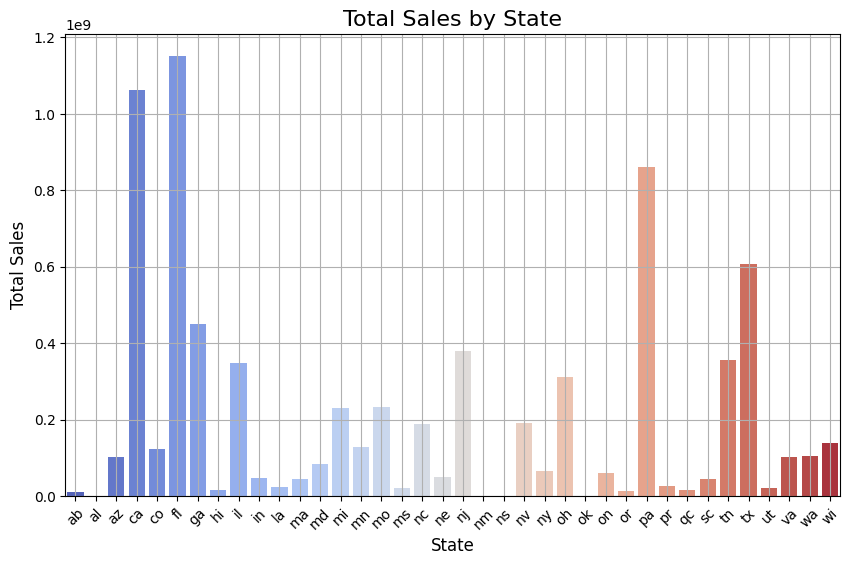

In [39]:
import seaborn as sns

# Grouping by state
state_sales = data.groupby('state')['sellingprice'].sum().reset_index()

# Plotting sales by state
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='sellingprice', data=state_sales, palette='coolwarm')
plt.title('Total Sales by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [45]:
import numpy as np
import statsmodels.api as sm

# Assuming 'price' and 'sales' columns exist
data['log_price'] = np.log(data['sellingprice'])
data['log_sales'] = np.log(data.groupby('saledate')['sellingprice'].transform('count'))

# Regression model for price elasticity
X = sm.add_constant(data['log_price'])
y = data['log_sales']
model = sm.OLS(y, X).fit()

# Price elasticity
elasticity = model.params['log_price']
print(f'Price Elasticity of Demand: {elasticity:.2f}')


Price Elasticity of Demand: 0.26


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
